In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import pandas as pd
import numpy as np # linear algebra
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam , SGD , RMSprop
df=pd.read_csv("/content/drive/MyDrive/assignment/BankNote_Authentication.csv")
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
df.size

6860

In [8]:
df.shape

(1372, 5)

In [9]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [10]:
df.isnull().any()

variance    False
skewness    False
curtosis    False
entropy     False
class       False
dtype: bool

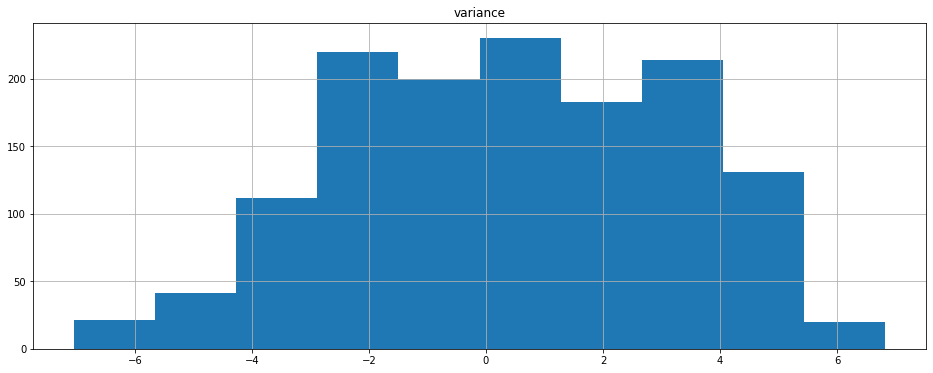

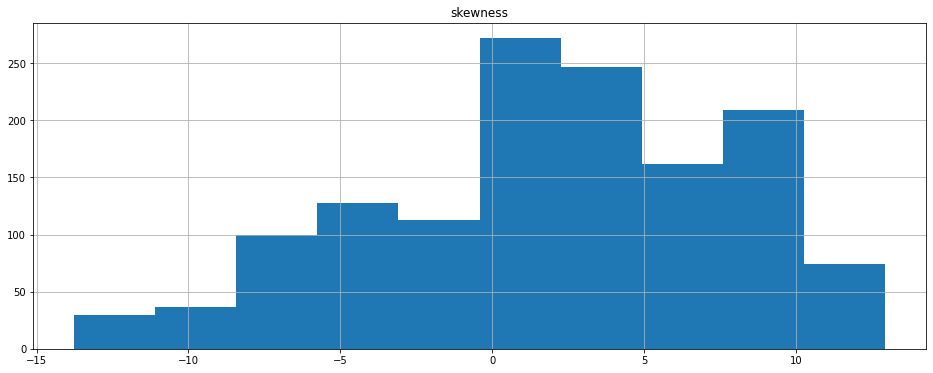

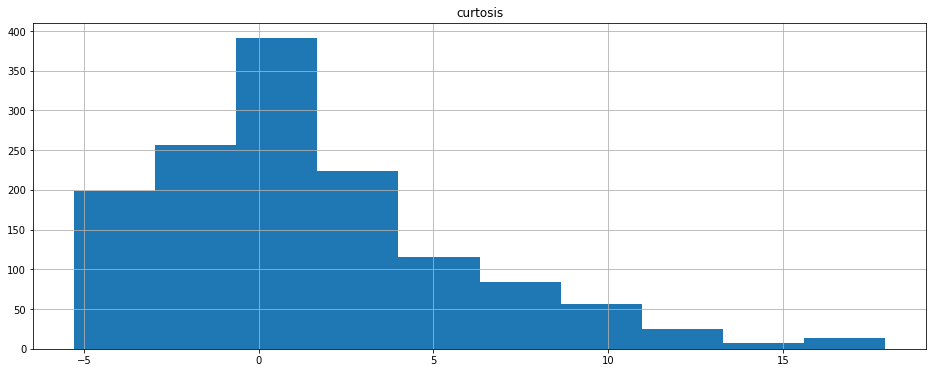

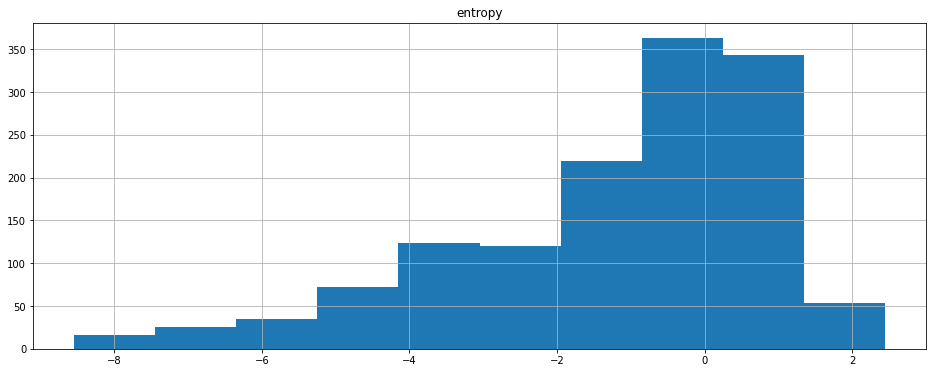

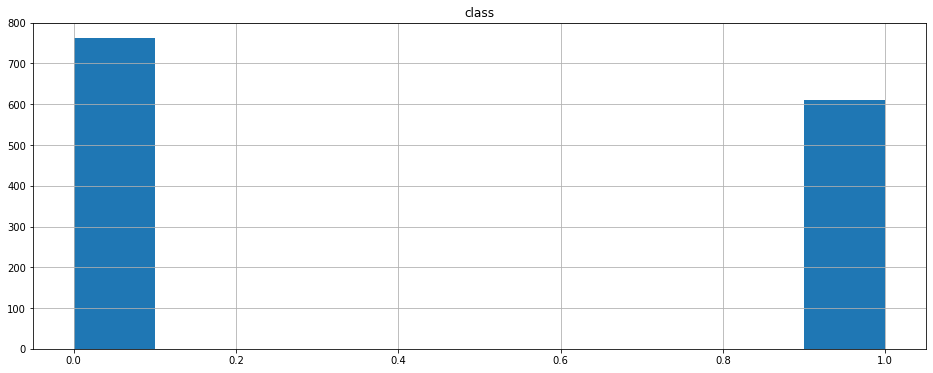

In [11]:
import matplotlib.pyplot as plt
for i in df.columns:
    plt.figure(figsize=(16, 6))
    df[i].hist()
    plt.title(i)

In [12]:
df = df.sample(frac=1).reset_index(drop=True)
classes = [0,1]
df.head(5)

,variance,skewness,curtosis,entropy,class
0,3.7731,7.207300,-1.68140,-0.947420,0
1,1.8373,6.129200,0.84027,0.552570,0
2,3.5189,6.332000,-1.77910,-0.020273,0
3,-1.7549,-0.080711,-0.75774,-0.370700,1
4,1.6472,0.482130,4.74490,1.225000,0


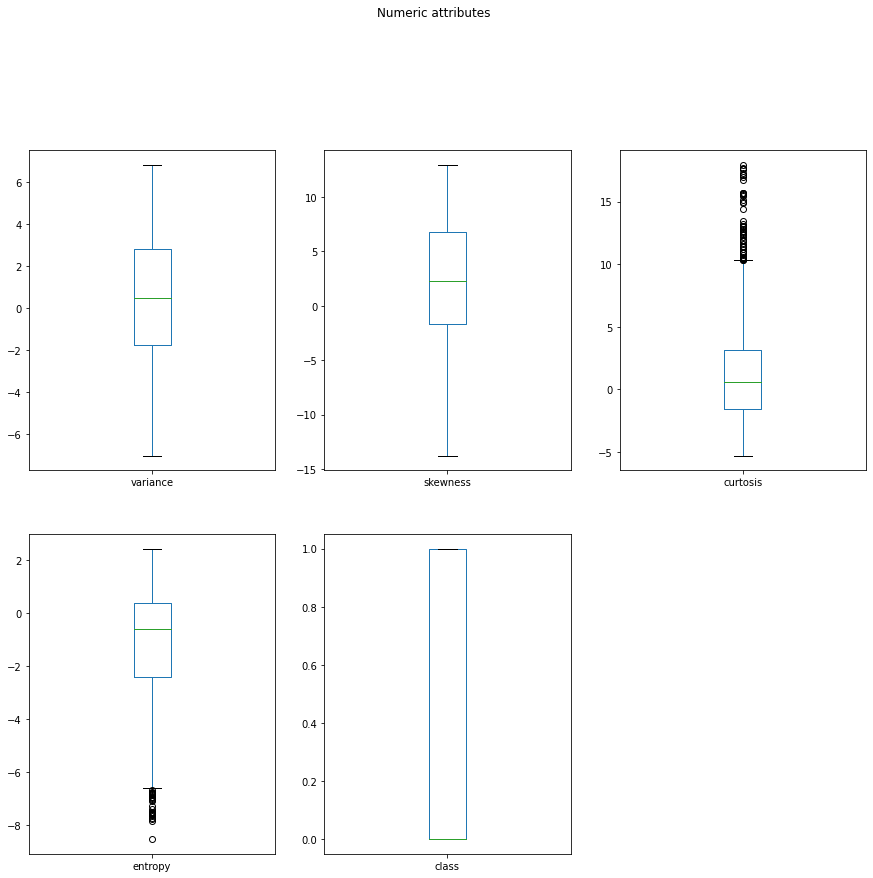

In [13]:
import seaborn as sns
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,20), title='Numeric attributes')
plt.show()

In [14]:
train_df = df[0:800].reset_index(drop=True)
validation_df = df[801:1200].reset_index(drop=True)
test_df = df[1200::].reset_index(drop=True)

In [15]:
train_Y =train_df['class']
train_X = train_df.loc[:, train_df.columns != 'class']

In [16]:
validation_Y =validation_df['class'].reset_index(drop=True)
validation_X = validation_df.loc[:, validation_df.columns != 'class']

In [17]:
model = tf.keras.models.Sequential([                    
        tf.keras.layers.Dense(4,activation='relu'),
        tf.keras.layers.Dense(4,activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

In [18]:
adam = Adam(0.001)
model.compile(optimizer='adam',loss=tf.keras.losses.binary_crossentropy,metrics=['accuracy'])

In [19]:
history=model.fit(x=train_X,
                  y=train_Y,
                  epochs=70,
                  validation_data =(validation_X,validation_Y))

Epoch 1/70
25/25 [==============================] - 1s 12ms/step - loss: 0.7828 - accuracy: 0.3950 - val_loss: 0.7558 - val_accuracy: 0.4336
Epoch 2/70
25/25 [==============================] - 0s 3ms/step - loss: 0.7207 - accuracy: 0.4725 - val_loss: 0.6989 - val_accuracy: 0.5113
Epoch 3/70
25/25 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.5638 - val_loss: 0.6620 - val_accuracy: 0.6266
Epoch 4/70
25/25 [==============================] - 0s 2ms/step - loss: 0.6383 - accuracy: 0.6413 - val_loss: 0.6252 - val_accuracy: 0.6591
Epoch 5/70
25/25 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.6825 - val_loss: 0.5895 - val_accuracy: 0.6992
Epoch 6/70
25/25 [==============================] - 0s 3ms/step - loss: 0.5715 - accuracy: 0.7088 - val_loss: 0.5588 - val_accuracy: 0.7193
Epoch 7/70
25/25 [==============================] - 0s 3ms/step - loss: 0.5395 - accuracy: 0.7387 - val_loss: 0.5244 - val_accuracy: 0.7494
Epoch 8/70
25/25 [=

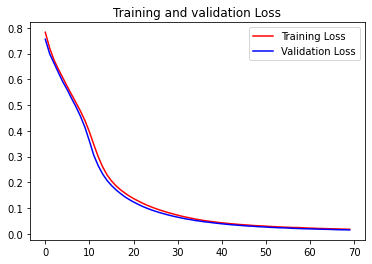

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [21]:
testing_data = test_df.loc[:, test_df.columns != 'class']
pred = model.predict(testing_data)
for x in range(len(pred)):
  if pred[x]<0.5:
    pred[x]=0
  else:
    pred[x]=1
# print(pred)
test_df['Predicted'] = pred


In [22]:
y_test = test_df['class']
y_pred = test_df['Predicted'].astype(int)

In [23]:
import itertools
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test, y_pred))
cnf_matrix = confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       103
           1       1.00      1.00      1.00        69

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172



<Figure size 432x288 with 0 Axes>

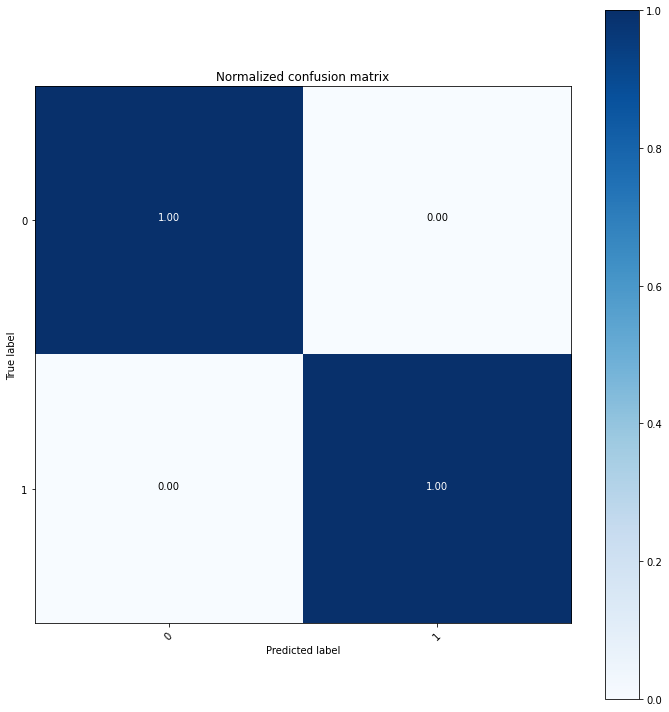

In [24]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

np.set_printoptions(precision=2)


# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=classes, title='Normalized confusion matrix')
plt.show()

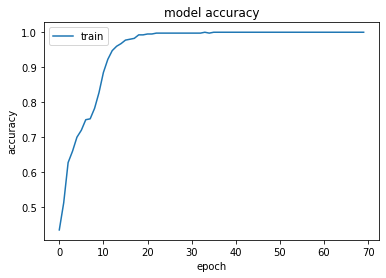

In [25]:
# ploating model accuracy
plt.plot(history.history['val_accuracy'])

plt.title("model accuracy")

plt.ylabel('accuracy')
plt.xlabel("epoch")
plt.legend(['train'],loc='upper left')

plt.show()

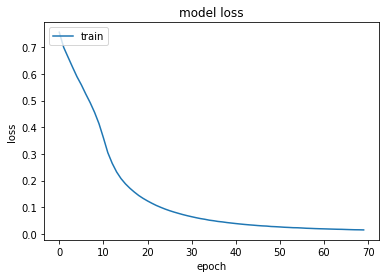

In [26]:
# ploating model loss
plt.plot(history.history['val_loss'])

plt.title("model loss")

plt.ylabel('loss')
plt.xlabel("epoch")
plt.legend(['train'],loc='upper left')

plt.show()

[0.51 0.28 0.15 0.06]


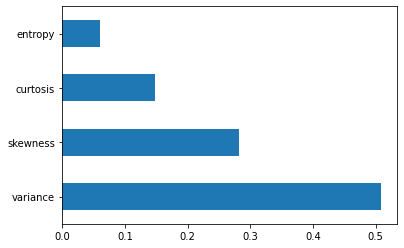

In [27]:
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()